In [1]:

library(igraph)


Attaching package: 'igraph'

The following objects are masked from 'package:stats':

    decompose, spectrum

The following object is masked from 'package:base':

    union



[1] "mean = 3.06"
[1] "var =  3.21761761761762"
[1] "theoretical mean = 3"
[1] "theoretical mean = 2.991"


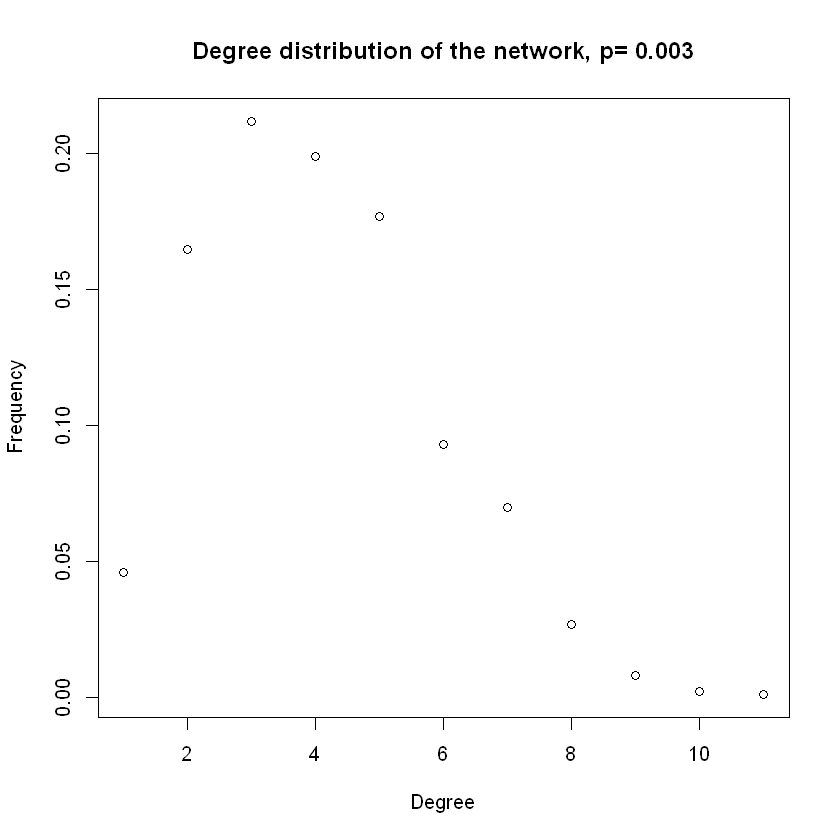

[1] "mean = 3.972"
[1] "var =  4.06528128128128"
[1] "theoretical mean = 4"
[1] "theoretical mean = 3.984"


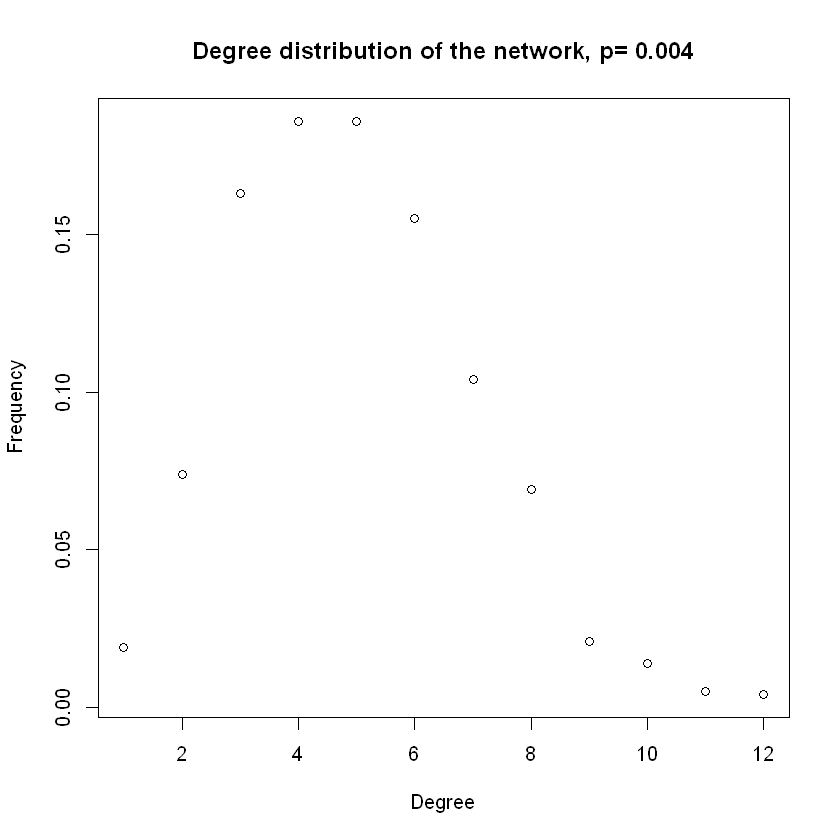

[1] "mean = 9.918"
[1] "var =  9.3286046046046"
[1] "theoretical mean = 10"
[1] "theoretical mean = 9.9"


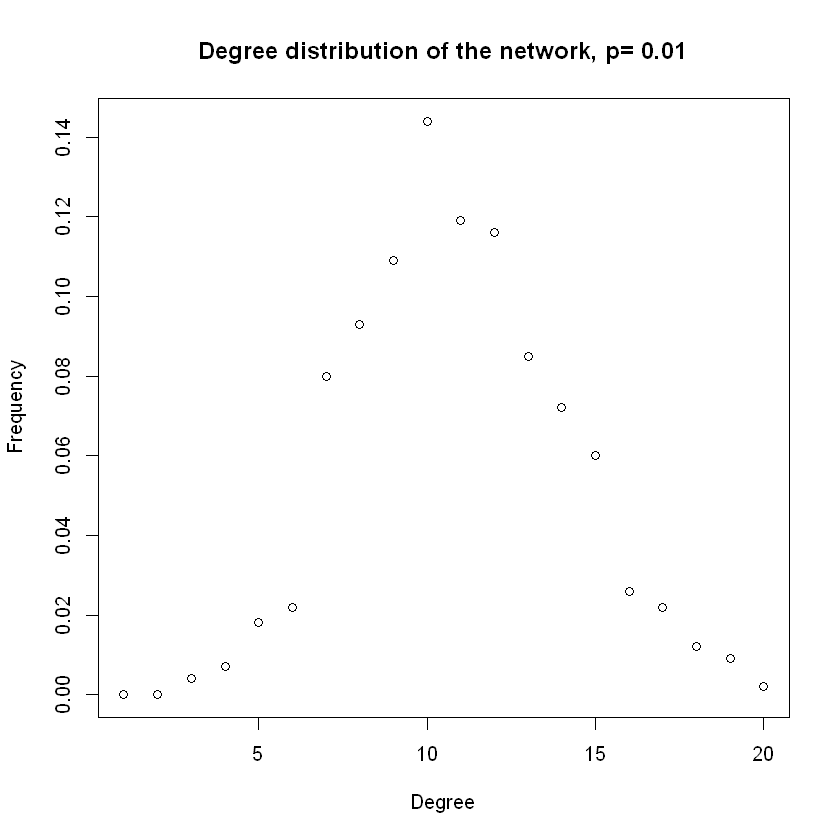

[1] "mean = 49.878"
[1] "var =  45.4525685685686"
[1] "theoretical mean = 50"
[1] "theoretical mean = 47.5"


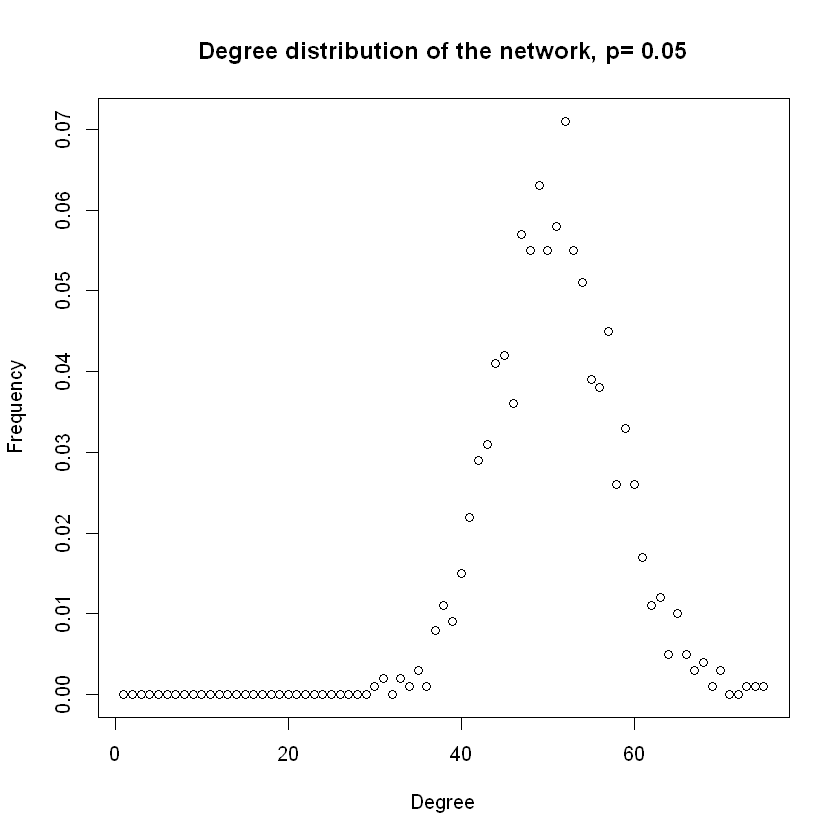

[1] "mean = 100.256"
[1] "var =  93.6521161161161"
[1] "theoretical mean = 100"
[1] "theoretical mean = 90"


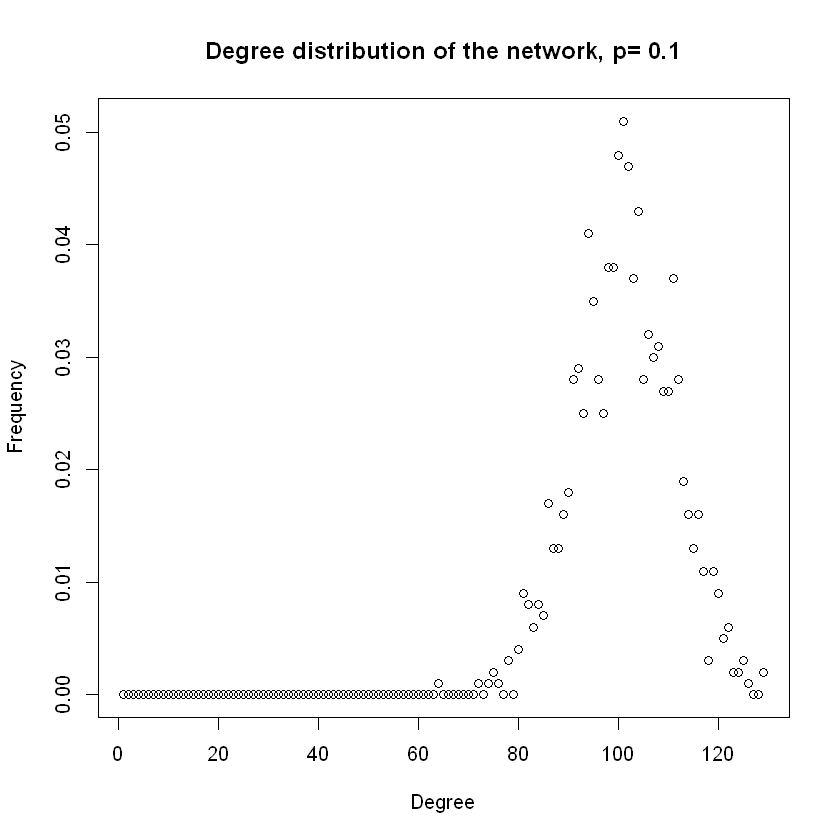

In [4]:
p <- c(0.003, 0.004, 0.01, 0.05, 0.1)
for(i in 1:length(p)){
    g <- erdos.renyi.game(1000, p[i], directed=F)
    #pdf(paste("1-1_p",i,".pdf",sep=""))
    plot(degree.distribution(g),main=paste("Degree distribution of the network, p=",p[i]),xlab="Degree",ylab="Frequency")
    degreesVector <- degree(g)
    print(paste("mean =", mean(degreesVector)))
    print(paste("var = ", var(degreesVector)))
    print(paste("theoretical mean =", 1000*p[i]))
    print(paste("theoretical mean =", 1000*p[i]*(1-p[i])))
    #hist(degreesVector)
    dev.copy2pdf(file = paste("1-1a_p",i,".pdf",sep=""))
}

In [19]:
n <- c(1:100)
p <- c(0.003, 0.004, 0.01, 0.05, 0.1)
for(x in p){
    connected <- 0
    for(i in n){
        g <- erdos.renyi.game(1000, x, directed=F)
        if (is.connected(g))
            connected = connected + 1
    }
    connected = connected / length(n)
    print(paste("Prob. of connected =", connected))
        
    if(connected < 1){
        g <- erdos.renyi.game(1000, x, directed=F)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        print(paste("diameter =", diameter(g.giant, unconnected=TRUE)))
        print(paste("# of nodes =", vcount(g.giant)))
    }
}

[1] "Prob. of connected = 0"
[1] "diameter = 15"
[1] "# of nodes = 942"
[1] "Prob. of connected = 0"
[1] "diameter = 11"
[1] "# of nodes = 985"
[1] "Prob. of connected = 0.95"
[1] "diameter = 6"
[1] "# of nodes = 999"
[1] "Prob. of connected = 1"
[1] "Prob. of connected = 1"


[1] "p = 0.001 GCC size = 0.221"


png 
  2

[1] "p = 0.00310848987554196 GCC size = 0.947749999999999"
[1] "p = 0.00317756742833178 GCC size = 0.95129"
[1] "p = 0.0032466449811216 GCC size = 0.95494"
[1] "p = 0.00331572253391143 GCC size = 0.95855"
[1] "p = 0.00338480008670125 GCC size = 0.96133"
[1] "p = 0.00345387763949107 GCC size = 0.96411"
[1] "p = 0.00352295519228089 GCC size = 0.96573"
[1] "p = 0.00359203274507071 GCC size = 0.969839999999999"
[1] "p = 0.00366111029786053 GCC size = 0.97221"
[1] "p = 0.00373018785065035 GCC size = 0.973439999999999"
[1] "p = 0.00379926540344017 GCC size = 0.975789999999999"
[1] "p = 0.00386834295623 GCC size = 0.97647"
[1] "p = 0.00393742050901982 GCC size = 0.97868"
[1] "p = 0.00400649806180964 GCC size = 0.980689999999999"
[1] "p = 0.00407557561459946 GCC size = 0.981489999999999"
[1] "p = 0.00414465316738928 GCC size = 0.983449999999999"
[1] "p = 0.0042137307201791 GCC size = 0.9849"
[1] "p = 0.00428280827296892 GCC size = 0.98473"
[1] "p = 0.00435188582575875 GCC size = 0.98586"
[1] "

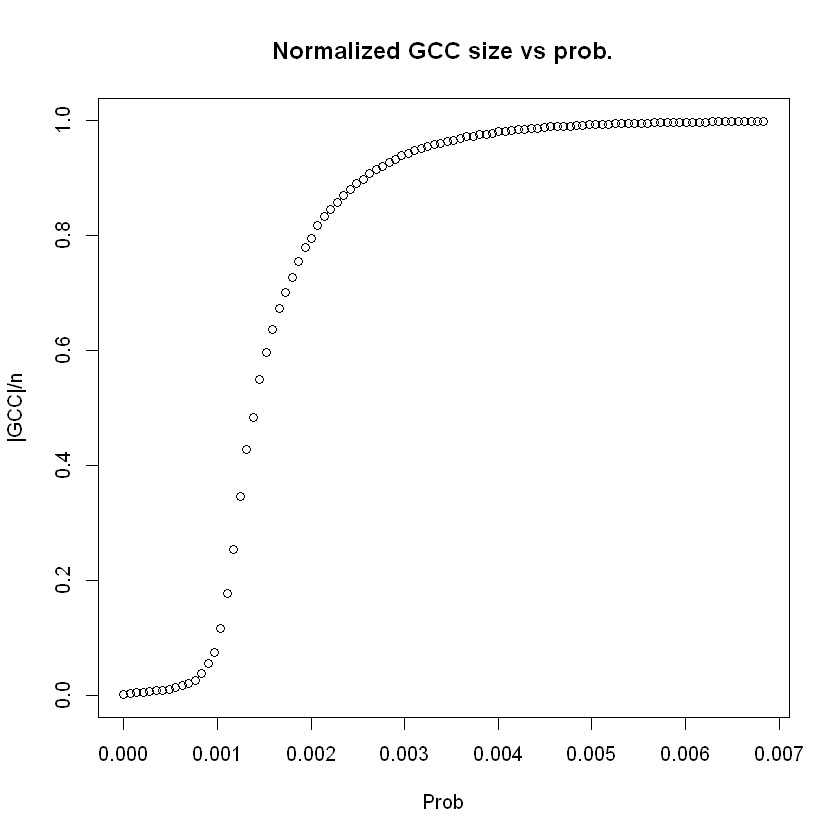

In [6]:
n <- 1000

g <- erdos.renyi.game(n, 1/1000, directed=F)
g.components <- clusters(g)
ix <- which.max(g.components$csize)
g.giant <- induced.subgraph(g, which(g.components$membership == ix))
y <- vcount(g.giant)/n
print(paste("p =", 1/1000, "GCC size =", y))


O <- log(n)/n
O <- O/100
x <- seq(0, 99*O, O)
y <- vector(mode="numeric",100)
for (i in 1:length(x)){
    for(j in 1:length(x)){
        g <- erdos.renyi.game(n, x[i], directed=F)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        y[[i]] <- y[[i]] + vcount(g.giant)/n
    }
    y[[i]] <- y[[i]]/100
}
plot(x,y,main="Normalized GCC size vs prob.",xlab="Prob",ylab="|GCC|/n")
dev.copy2pdf(file = "1-1b.pdf")
for (i in 3:length(y)){
    if(abs(y[[i-1]]-y[[i]]) < 0.01 & abs(y[[i-2]]-y[[i]]) < 0.01 & y[[i]] > 0.5){
        print(paste("p =", x[i], "GCC size =", y[[i]]))
    }
}

png 
  2

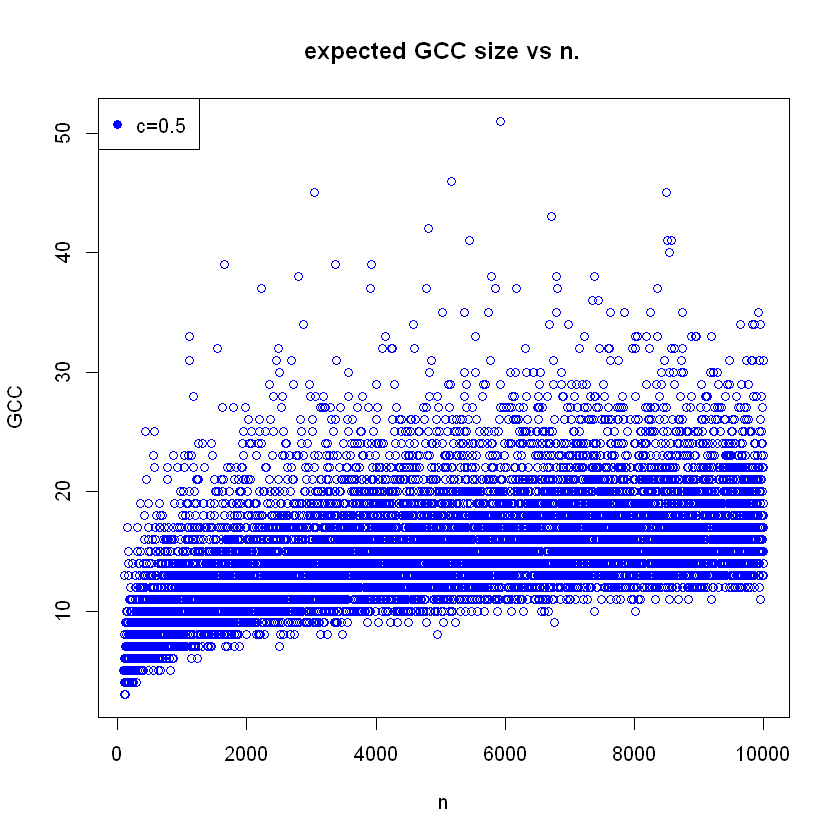

png 
  2

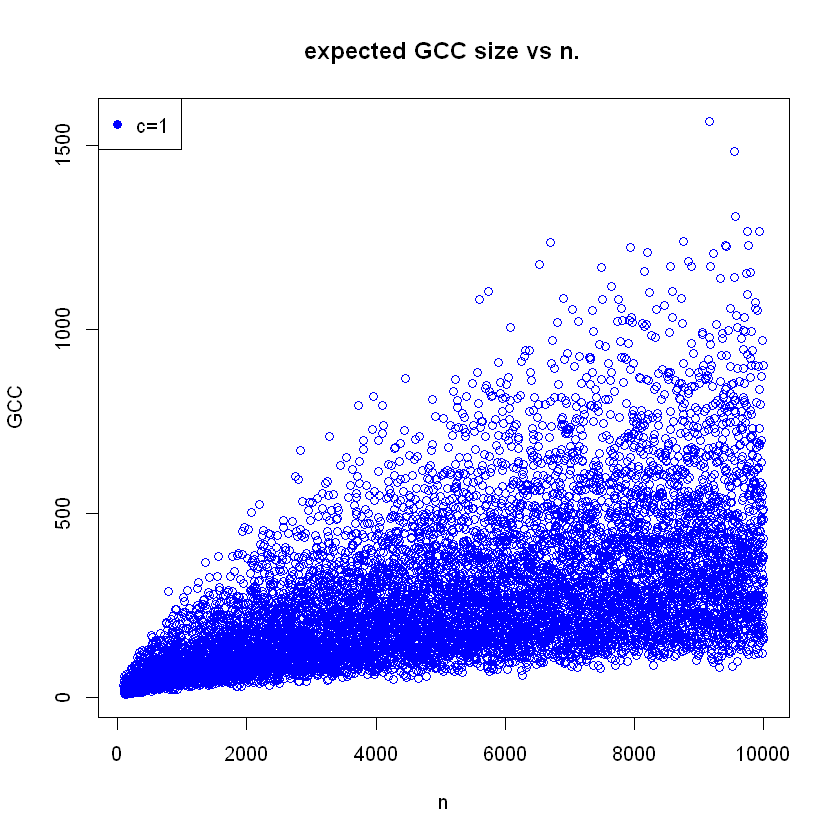

png 
  2

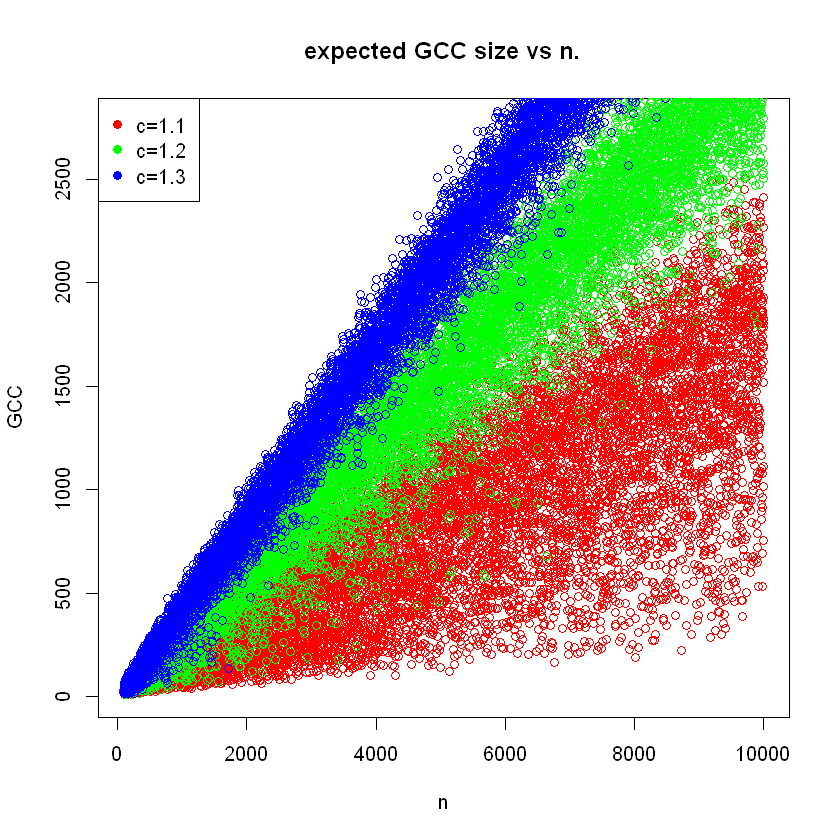

png 
  2

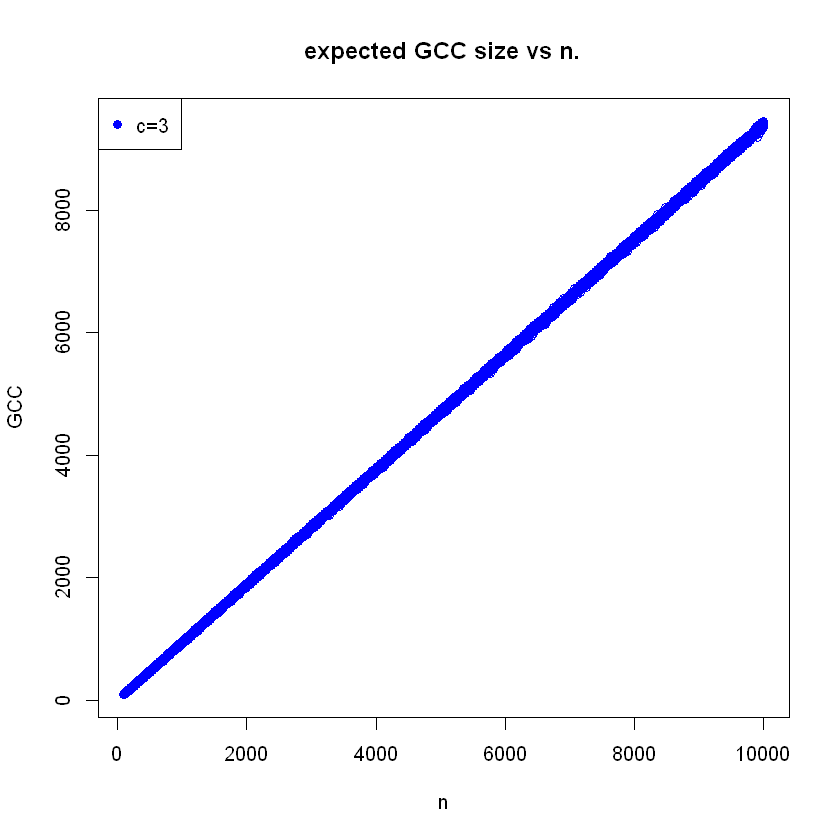

In [20]:
n <- c(100:10000)
c <- c(0.5,1,1.1,1.2,1.3,3)
y <- vector(mode="numeric",length(n))
m <- matrix(0, nrow = length(c), ncol = length(n))
for(j in 1:length(c)){
    for(i in 1:length(n)){
        p <- c[j]/n[i]
        g <- erdos.renyi.game(n[i], p, directed=F)
        g.components <- clusters(g)
        ix <- which.max(g.components$csize)
        g.giant <- induced.subgraph(g, which(g.components$membership == ix))
        m[j,i] <- vcount(g.giant)
    }
}
plot(n,m[1, ],main="expected GCC size vs n.",xlab="n",ylab="GCC",col="blue")
legend("topleft", legend=c("c=0.5"),
       col=c("blue"), pch = 19)
dev.copy2pdf(file = "1-3a_c1.pdf")

plot(n,m[2, ],main="expected GCC size vs n.",xlab="n",ylab="GCC",col="blue")
legend("topleft", legend=c("c=1"),
       col=c("blue"), pch = 19)
dev.copy2pdf(file = "1-3a_c2.pdf")

plot(n,m[3, ],main="expected GCC size vs n.",xlab="n",ylab="GCC",col='red')
points(n,m[4, ], col="green")
points(n,m[5, ], col="blue")
legend("topleft", legend=c("c=1.1", "c=1.2", "c=1.3"),
       col=c("red", "green","blue"), pch = c(19, 19, 19))
dev.copy2pdf(file = "1-3a_c3.pdf")

plot(n,m[6, ],main="expected GCC size vs n.",xlab="n",ylab="GCC",col='blue')
legend("topleft", legend=c("c=3"),
       col=c("blue"), pch = 19)
dev.copy2pdf(file = "1-3a_c4.pdf")

png 
  2

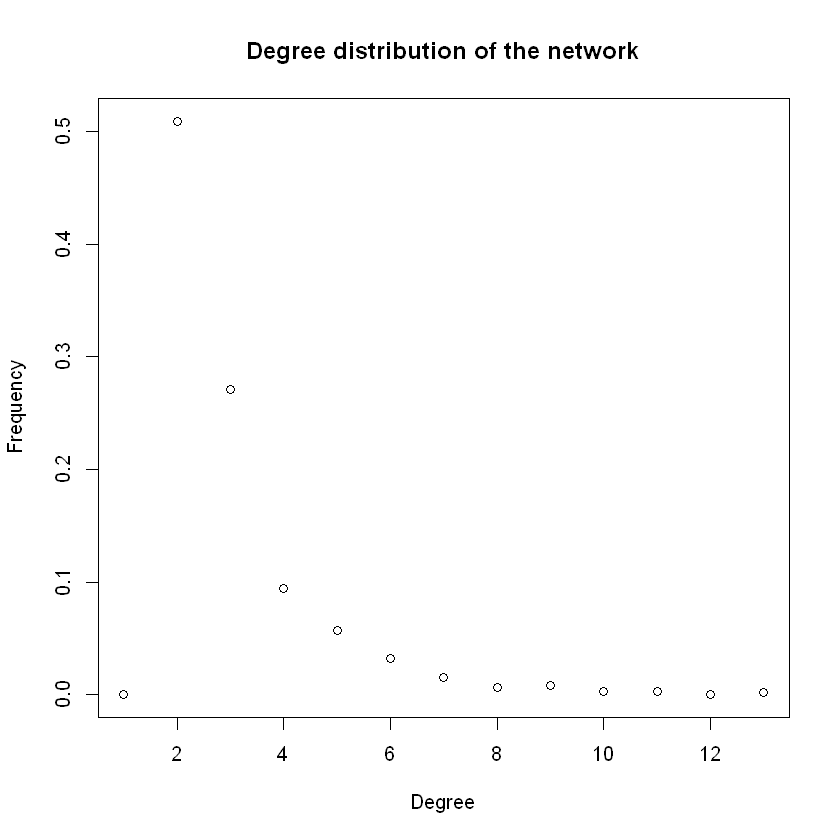

In [22]:
#parameter:
#alpha = pa.exp
#Beta = aging.exp
#a = zero.deg.appeal (default 1)
#b = zero.age.appeal (default 0)
#c = deg.coef (default 1)
#d = age.coef (default 1)
g <- sample_pa_age(1000, pa.exp=1, aging.exp=-1, m=1, aging.bin=1000, directed=FALSE)
plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
dev.copy2pdf(file = "1-3b.pdf")


In [25]:
d <- degree(g)
print(power.law.fit(d)$alpha)

[1] 2.882244


In [31]:
fc1 <- fastgreedy.community(g)
print(modularity(fc1))

[1] 0.934973
